In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import numpy as np

In [2]:
stock_df=pd.read_csv ("stock_price.csv")

In [3]:
stock_df.head()

,日付け,終値,始値,高値,安値,出来高,変化率 %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


In [4]:
print(f"データ長は{len(stock_df)}")

データ長は9202


In [5]:
#明確なnull値はなし
stock_df.isnull().all()

日付け      False
終値       False
始値       False
高値       False
安値       False
出来高      False
変化率 %    False
dtype: bool

In [6]:
Vol_unit= stock_df['出来高'].str[-1]

# 出来高の単位
#単位の種類とカウントを集計
unit_counts = Vol_unit.value_counts()

# 結果を表示
print(unit_counts)


出来高
M    9193
B       9
Name: count, dtype: int64


In [7]:
#出来高の文字列を整数に変換する関数
def convert_to_int(volume_str):    
    try:
        if volume_str.endswith('B'):
            return int(float(volume_str[:-1]) * 1_000_000_000)
        elif volume_str.endswith('M'):
            return int(float(volume_str[:-1]) * 1_000_000)
        else:
            return int(float(volume_str))
    except (ValueError, TypeError):
        return None  # 変換エラーの場合はNoneを返す(今回はなし)

In [8]:
#整数化した出来高を'出来高_整数'に入れる
stock_df['出来高_整数'] = stock_df['出来高'].apply(convert_to_int)

In [9]:
max_value = stock_df['出来高_整数'].max()
min_value = stock_df['出来高_整数'].min()

# 最大値が最小値の何倍かを計算
if min_value !=0:
    ratio = max_value / min_value
    print(f"最大値は最小値の{ratio}倍")
else:
    print("最小値が0")

最大値は最小値の137.04496788008566倍


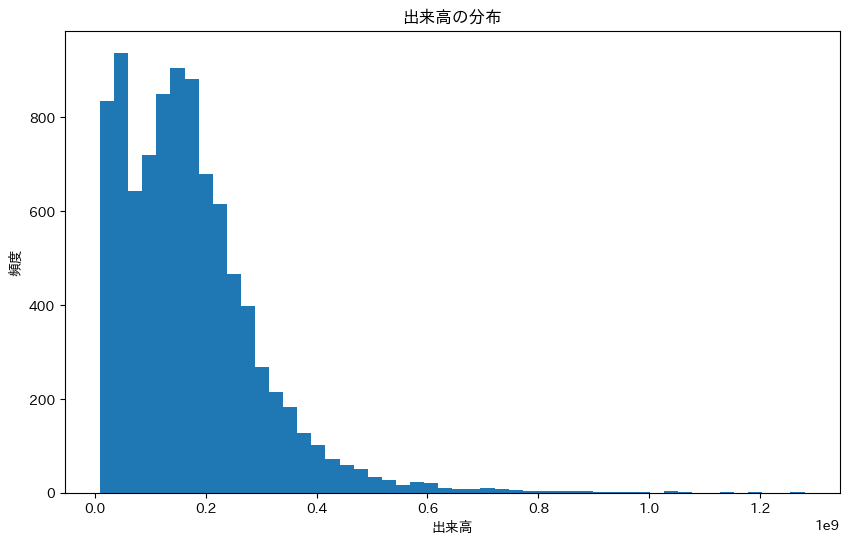

In [10]:
plt.figure(figsize=(10, 6))  # グラフサイズを指定
plt.hist(stock_df['出来高_整数'], bins=50) # binsでビンの数を調整
plt.title('出来高の分布')
plt.xlabel('出来高')
plt.ylabel('頻度')
plt.show()

In [11]:
#出来高の単位はM,Bであるが、最小値と最大値の間に137倍もの差があり、また、スケールも大きい、ヒストグラムで見ても分布が左によっている
#これらの改善のためlogスケールを取ってみる
stock_df['log(出来高)'] = np.log10(stock_df['出来高_整数']) 
# 元の'出来高_整数'カラムを削除
stock_df.drop('出来高_整数', axis=1, inplace=True)

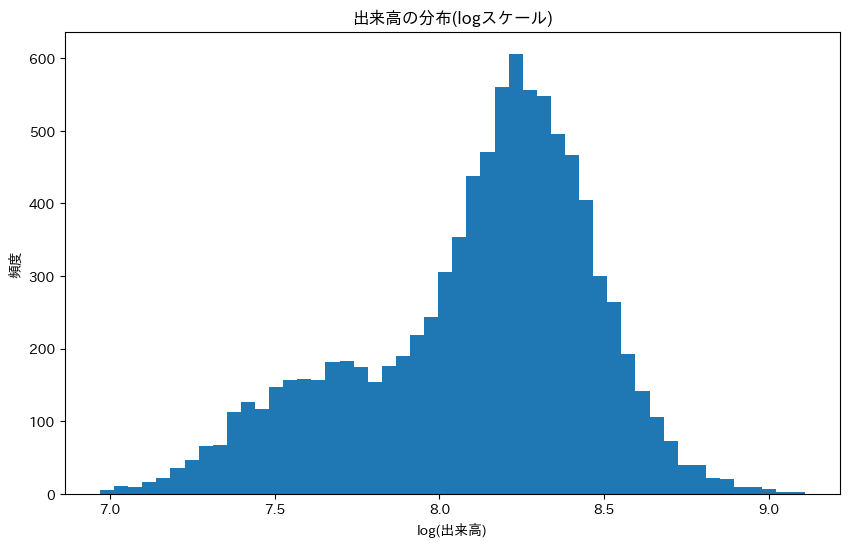

In [12]:
plt.figure(figsize=(10, 6))  # グラフサイズを指定
plt.hist(stock_df['log(出来高)'], bins=50) # binsでビンの数を調整
plt.title('出来高の分布(logスケール)')
plt.xlabel('log(出来高)')
plt.ylabel('頻度')
plt.show()

In [13]:
stock_df['日付け'] = pd.to_datetime(stock_df['日付け'])

In [14]:
#日時を処理しやすいように年、月、日に分ける
stock_df['year'] = pd.to_datetime(stock_df['日付け']).dt.year
stock_df['month'] = pd.to_datetime(stock_df['日付け']).dt.month
stock_df['date'] = pd.to_datetime(stock_df['日付け']).dt.day

In [15]:
#月曜:0~日曜:6
stock_df['曜日'] = stock_df['日付け'].dt.weekday

In [16]:
stock_df.head()

,日付け,終値,始値,高値,安値,出来高,変化率 %,log(出来高),year,month,date,曜日
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%,7.898451,2024,8,1,3
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%,8.240325,2024,7,31,2
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%,8.140319,2024,7,30,1
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%,8.101335,2024,7,29,0
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%,8.190556,2024,7,26,4


In [17]:
#変化率はとりあえず%の数値をそのまま表示
def convert_to_float(percentage_str):
    try:
        return float(percentage_str.rstrip('%'))
    except (ValueError, TypeError):
        return None  

In [18]:
stock_df['変化率_数値'] = stock_df['変化率 %'].apply(convert_to_float)

In [19]:
stock_df['日付け'] = pd.to_datetime(stock_df['日付け'])

min_date = stock_df['日付け'].min()
print(min_date)

1987-02-12 00:00:00


In [20]:
start = datetime(1987,2,16)
stock_df['week'] = (stock_df['日付け'] - start) // timedelta(weeks=1)+1

# 年と週を組み合わせてソート
stock_df['year'] = stock_df['日付け'].dt.year  # 年を取得
stock_df = stock_df.sort_values(by=['year', 'week', '曜日'])

In [21]:
stock_df.head()

,日付け,終値,始値,高値,安値,出来高,変化率 %,log(出来高),year,month,date,曜日,変化率_数値,week
9201,1987-02-12,182.4,182.4,182.4,182.4,1.28B,16.25%,9.107210,1987,2,12,3,16.25,0
9200,1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%,8.625703,1987,2,13,4,-5.43,0
9199,1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%,8.556917,1987,2,16,0,1.74,1
9198,1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%,8.945227,1987,2,17,1,3.93,1
9197,1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%,8.900416,1987,2,18,2,4.82,1


In [22]:
stock_df.tail()

,日付け,終値,始値,高値,安値,出来高,変化率 %,log(出来高),year,month,date,曜日,変化率_数値,week
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%,8.190556,2024,7,26,4,-0.13,1954
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%,8.101335,2024,7,29,0,1.14,1955
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%,8.140319,2024,7,30,1,-0.63,1955
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%,8.240325,2024,7,31,2,1.07,1955
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%,7.898451,2024,8,1,3,-2.56,1955


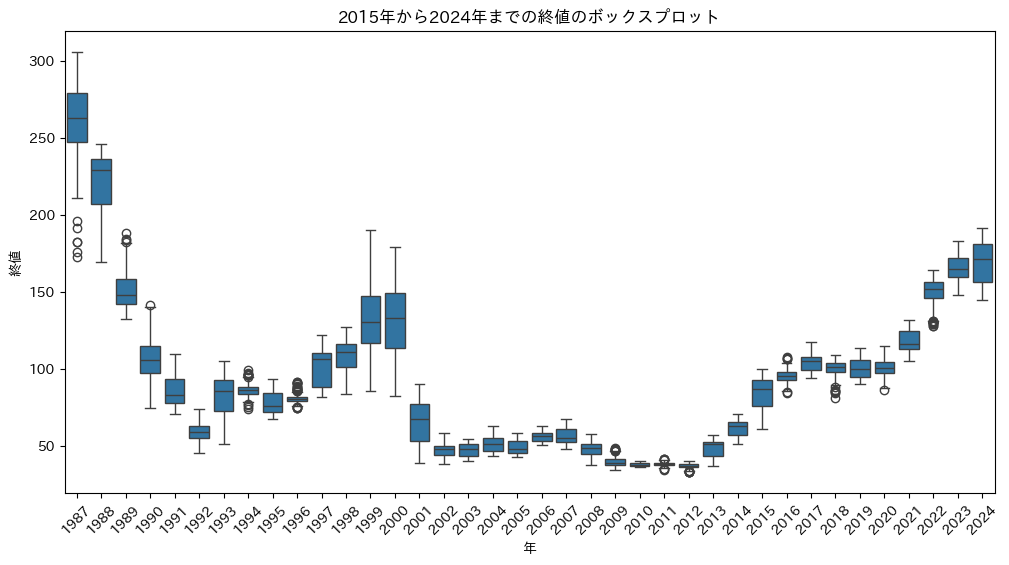

In [23]:
#終値の外れ値の観測
years = range(1987, 2025)
stock_df_subset = stock_df[stock_df['year'].isin(years)]

# ボックスプロットを描画
plt.figure(figsize=(12, 6))  # グラフのサイズを調整
sns.boxplot(x='year', y='終値', data=stock_df_subset, orient='v') # orient='v'で縦向きに設定
plt.title('2015年から2024年までの終値のボックスプロット')
plt.xlabel('年',)
plt.ylabel('終値')
plt.xticks(rotation=45)  # 年ラベルを回転
plt.show()

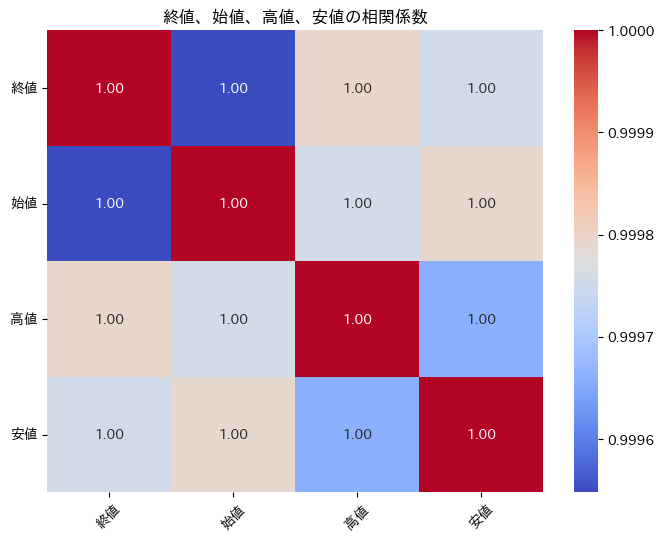

In [24]:
price_df = stock_df[["終値", "始値", "高値", "安値"]]

# 相関係数を計算
correlation_matrix = price_df.corr()

# ヒートマップを描画
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('終値、始値、高値、安値の相関係数')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
 #全体的に相関が非常に強い。そのため、他の特徴量を作ってみる

In [25]:
stock_df['変動幅'] = stock_df['高値'] - stock_df['安値']

# 高値と安値の中間値を計算
stock_df['中間値'] = (stock_df['高値'] + stock_df['安値']) / 2

In [26]:
stock_df.head()

,日付け,終値,始値,高値,安値,出来高,変化率 %,log(出来高),year,month,date,曜日,変化率_数値,week,変動幅,中間値
9201,1987-02-12,182.4,182.4,182.4,182.4,1.28B,16.25%,9.107210,1987,2,12,3,16.25,0,0.0,182.40
9200,1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%,8.625703,1987,2,13,4,-5.43,0,4.0,174.50
9199,1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%,8.556917,1987,2,16,0,1.74,1,9.8,170.60
9198,1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%,8.945227,1987,2,17,1,3.93,1,8.8,179.90
9197,1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%,8.900416,1987,2,18,2,4.82,1,4.9,188.75


以下、追加した特徴量の分布確認

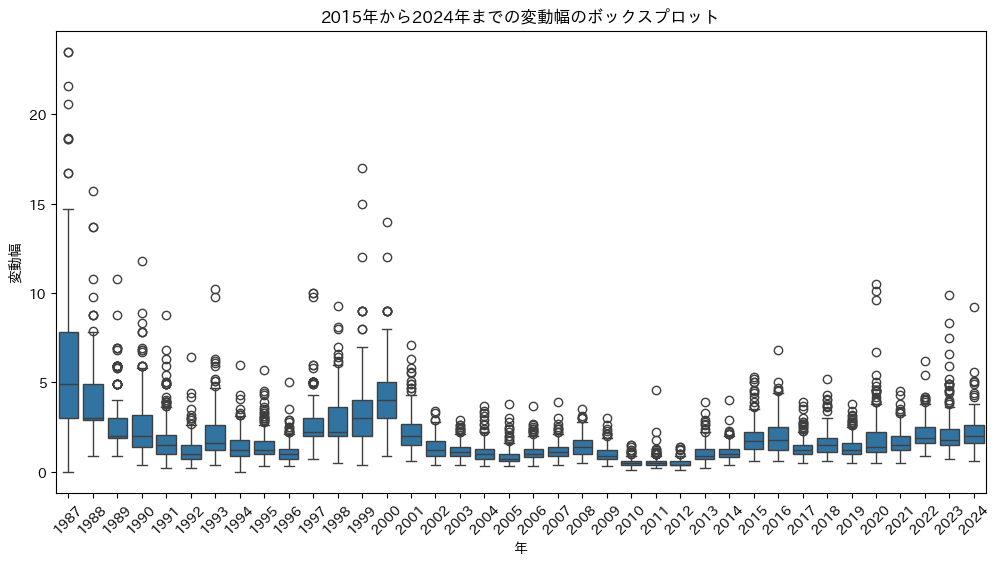

In [27]:
#変動幅の分布確認
years = range(1987, 2025)
stock_df_subset = stock_df[stock_df['year'].isin(years)]

# ボックスプロットを描画
plt.figure(figsize=(12, 6))  # グラフのサイズを調整
sns.boxplot(x='year', y='変動幅', data=stock_df_subset, orient='v') # orient='v'で縦向きに設定
plt.title('2015年から2024年までの変動幅のボックスプロット')
plt.xlabel('年',)
plt.ylabel('変動幅')
plt.xticks(rotation=45)  # 年ラベルを回転
plt.show()
#中央値は安定しているが各年において外れ値が極めて多い

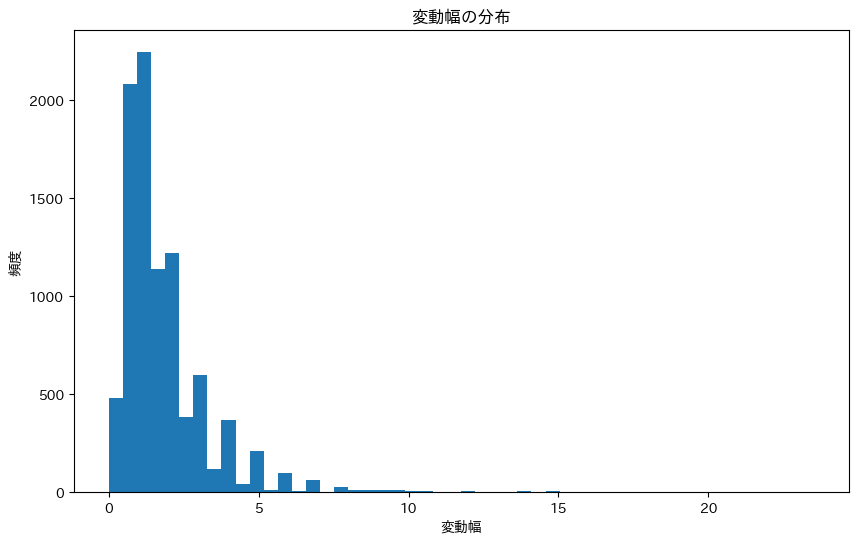

In [28]:
plt.figure(figsize=(10, 6))  # グラフサイズを指定
plt.hist(stock_df['変動幅'], bins=50) # binsでビンの数を調整
plt.title('変動幅の分布')
plt.xlabel('変動幅')
plt.ylabel('頻度')
plt.show()

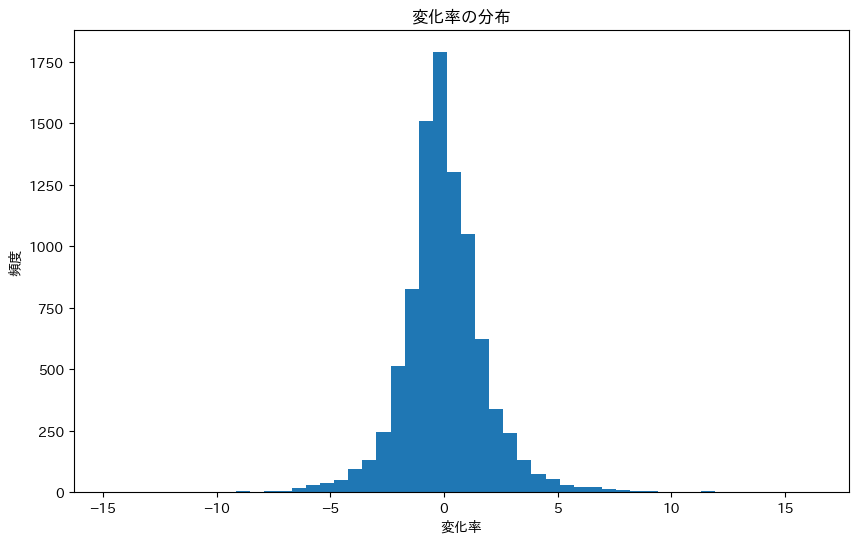

In [29]:
plt.figure(figsize=(10, 6))  # グラフサイズを指定
plt.hist(stock_df['変化率_数値'], bins=50) # binsでビンの数を調整
plt.title('変化率の分布')
plt.xlabel('変化率')
plt.ylabel('頻度')
plt.show()

In [30]:
#年毎のデータ数確認
#概ね平日数に一致しているため祝日、土日を除いて欠損は(あったとしても)ごく少数
year_counts = stock_df['year'].value_counts()
year_counts = year_counts.sort_index()
print(year_counts)

year
1987    221
1988    246
1989    248
1990    246
1991    246
1992    247
1993    246
1994    247
1995    249
1996    247
1997    245
1998    247
1999    245
2000    248
2001    246
2002    246
2003    245
2004    246
2005    245
2006    248
2007    245
2008    241
2009    243
2010    245
2011    245
2012    248
2013    245
2014    244
2015    244
2016    245
2017    247
2018    245
2019    241
2020    242
2021    245
2022    244
2023    246
2024    143
Name: count, dtype: int64


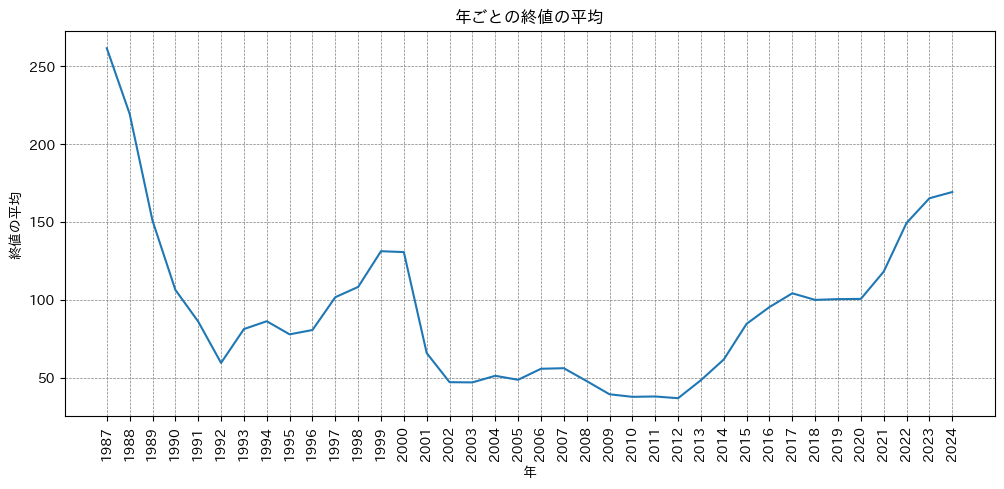

In [31]:
average_prices = stock_df.groupby('year')['終値'].mean()
plt.figure(figsize=(12, 5)) 
plt.plot(average_prices.index, average_prices.values)
plt.title('年ごとの終値の平均')
plt.xlabel('年')
plt.ylabel('終値の平均')
plt.xticks(average_prices.index,rotation=90) 
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.show()

1990年代初頭までのバブル崩壊と2001年ごろの大きな下落(おそらく9.11同時多発テロの影響)および2008~2013年ごろまでのリーマンショック
はデータとしてイレギュラーな可能性が高い
イレギュラーデータが多いため、これらへの対応を考える必要がある
ただし、2017~2020年に株価が低下していないものの停滞している原因は不明である

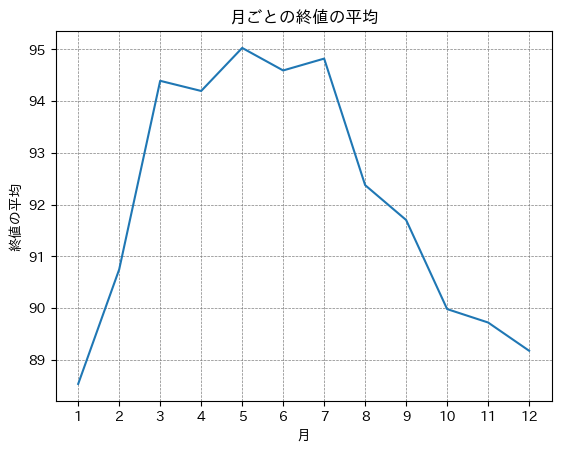

In [32]:
#月毎の終値の平均を見てみる
average_prices = stock_df.groupby('month')['終値'].mean()
plt.plot(average_prices.index, average_prices.values)

plt.title('月ごとの終値の平均')
plt.xlabel('月')
plt.ylabel('終値の平均')
plt.xticks(average_prices.index) 
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.show()
 ##平均化されているため正しい傾向が出ていない可能性がある、年毎に可視化する

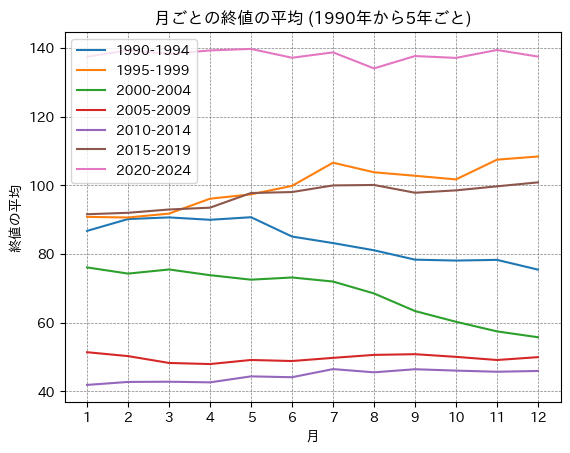

In [33]:
#年内の月毎の株価変動はそれなりの季節性があると予想される
for start_year in range(1990, stock_df['year'].max() + 1, 5):
    end_year = min(start_year + 4, stock_df['year'].max())  # 5年間またはデータの最終年まで
    stock_df_subset = stock_df[(stock_df['year'] >= start_year) & (stock_df['year'] <= end_year)]
    
    if len(stock_df_subset) == 0: # 期間にデータが存在しない場合はスキップ
        continue

    average_prices = stock_df_subset.groupby('month')['終値'].mean()

    plt.plot(average_prices.index, average_prices.values, label=f'{start_year}-{end_year}')
    
    plt.xticks(average_prices.index)


# グラフのタイトルと軸ラベル、凡例を設定
plt.title('月ごとの終値の平均 (1990年から5年ごと)')
plt.xlabel('月')
plt.ylabel('終値の平均')
plt.legend() # 凡例を表示

plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# グラフを表示
plt.show()

#年毎にスケールが違いすぎるので年の中での変動を表現しづらい、年毎のスケーリングを行う

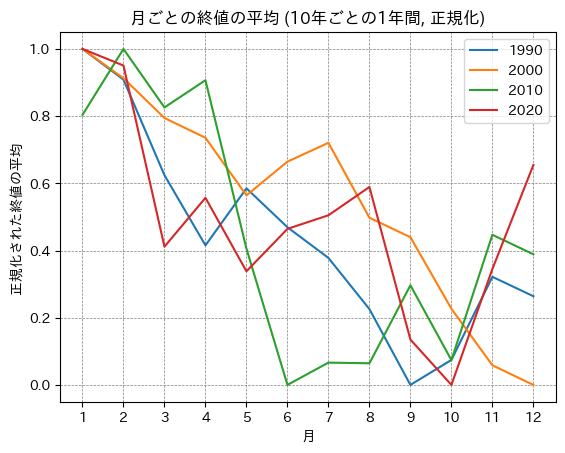

In [34]:

for year_ in range(1990, stock_df['year'].max() + 1, 10):
    # 10年ごとの1年間のデータのみを抽出、スケーリングするとグラフ同士が重なるので視認性のため折れ線は4本のみ
    stock_df_subset = stock_df[stock_df['year'] == year_]
    
    if len(stock_df_subset) == 0:
        continue

    average_prices = stock_df_subset.groupby('month')['終値'].mean()

    # 正規化処理
    min_val = average_prices.min()
    max_val = average_prices.max()
    normalized_average_prices = (average_prices - min_val) / (max_val - min_val) if max_val != min_val else 0

    plt.plot(normalized_average_prices.index, normalized_average_prices.values, label=f'{year_}') # labelを年のみに変更
    plt.xticks(normalized_average_prices.index)

# グラフのタイトルと軸ラベル、凡例を設定
plt.title('月ごとの終値の平均 (10年ごとの1年間, 正規化)') # タイトルを修正
plt.xlabel('月')
plt.ylabel('正規化された終値の平均')
plt.legend()
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# グラフを表示
plt.show()

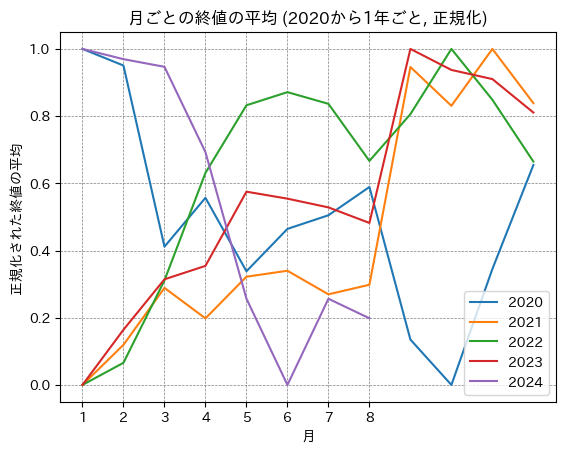

In [35]:

for year_ in range(2020, stock_df['year'].max() + 1):
    stock_df_subset = stock_df[stock_df['year'] == year_]
    
    if len(stock_df_subset) == 0:
        continue

    average_prices = stock_df_subset.groupby('month')['終値'].mean()

    # 正規化処理
    min_val = average_prices.min()
    max_val = average_prices.max()
    normalized_average_prices = (average_prices - min_val) / (max_val - min_val) if max_val != min_val else 0

    plt.plot(normalized_average_prices.index, normalized_average_prices.values, label=f'{year_}') # labelを年のみに変更
    plt.xticks(normalized_average_prices.index)

# グラフのタイトルと軸ラベル、凡例を設定
plt.title('月ごとの終値の平均 (2020から1年ごと, 正規化)') # タイトルを修正
plt.xlabel('月')
plt.ylabel('正規化された終値の平均')
plt.legend()
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
# グラフを表示
plt.show()

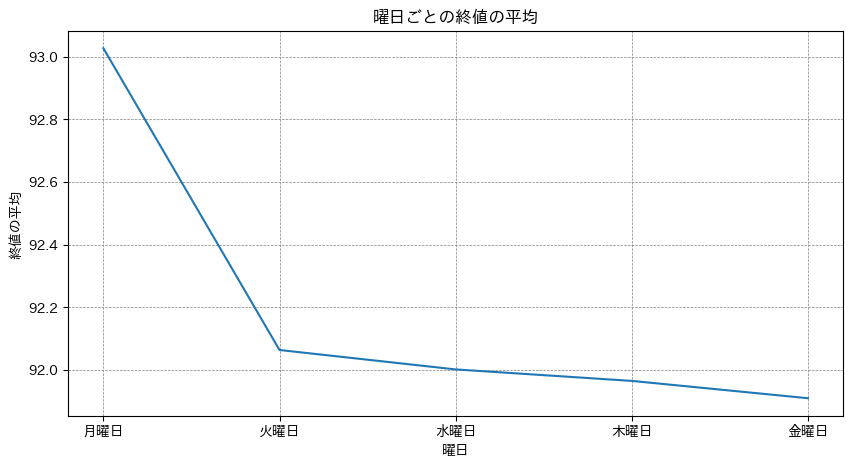

In [36]:
average_prices = stock_df.groupby('曜日')['終値'].mean()

weekdays = {
    0: '月曜日',
    1: '火曜日',
    2: '水曜日',
    3: '木曜日',
    4: '金曜日',
}
average_prices.index = [weekdays[i] for i in average_prices.index]

plt.figure(figsize=(10, 5))
plt.plot(average_prices.index, average_prices.values)

plt.title('曜日ごとの終値の平均')
plt.xlabel('曜日')
plt.ylabel('終値の平均')

plt.xlabel('曜日')
plt.ylabel('終値の平均')
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.show()

#こちらもかなり不自然な結果、調べたところ月曜だけ株価が極端に高いというような話は出てこない

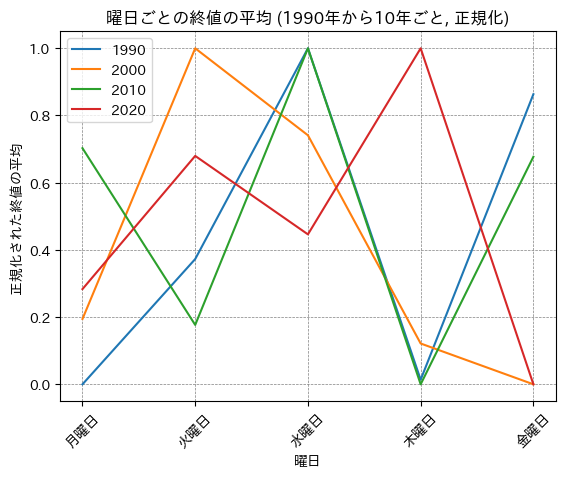

In [37]:
for year_ in range(1990, stock_df['year'].max() + 1, 10):
    stock_df_subset = stock_df[stock_df['year'] == year_]

    if len(stock_df_subset) == 0:
        continue

    average_prices = stock_df_subset.groupby('曜日')['終値'].mean()

    # 年内で正規化処理
    min_val = average_prices.min()
    max_val = average_prices.max()
    normalized_average_prices = (average_prices - min_val) / (max_val - min_val) if max_val != min_val else 0

    normalized_average_prices.index = [weekdays[i] for i in normalized_average_prices.index if i in weekdays]

    plt.plot(normalized_average_prices.index, normalized_average_prices.values, label=f'{year_}')  # 同じFigureにplot


plt.xticks(normalized_average_prices.index, rotation=45)  # xticksをループの外に移動

plt.title('曜日ごとの終値の平均 (1990年から10年ごと, 正規化)')  # タイトルはループの外に
plt.xlabel('曜日')
plt.ylabel('正規化された終値の平均')
plt.legend() 
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.show() 

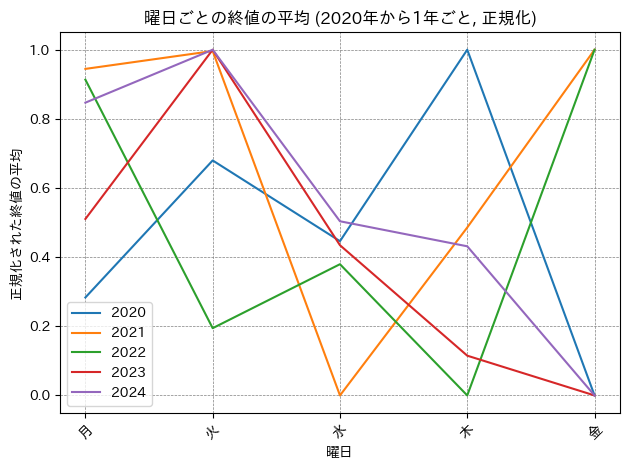

In [38]:
weekdays = {0: '月', 1: '火', 2: '水', 3: '木', 4: '金'}


for year_ in range(2020,  stock_df['year'].max() + 1): 
    stock_df_subset = stock_df[stock_df['year'] == year_]

    if len(stock_df_subset) == 0:
        continue

    average_prices = stock_df_subset.groupby('曜日')['終値'].mean()

    # 年内で正規化処理
    min_val = average_prices.min()
    max_val = average_prices.max()
    normalized_average_prices = (average_prices - min_val) / (max_val - min_val) if max_val != min_val else 0


    # 曜日ラベルの適用と存在しない曜日の処理 (エラーを防ぐ)
    valid_indices = [i for i in normalized_average_prices.index if i in weekdays]
    normalized_average_prices = normalized_average_prices.loc[valid_indices] # .locを使用して有効なインデックスのみを選択
    normalized_average_prices.index = [weekdays[i] for i in valid_indices]


    plt.plot(normalized_average_prices.index, normalized_average_prices.values, label=f'{year_}')


plt.xticks(normalized_average_prices.index, rotation=45) 
plt.title('曜日ごとの終値の平均 (2020年から1年ごと, 正規化)')
plt.xlabel('曜日')
plt.ylabel('正規化された終値の平均')
plt.legend()
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.tight_layout()  # グラフ要素が重ならないように調整
plt.show()

In [39]:
# CSVファイルとして保存
stock_df.to_csv('stock_data.csv', index=False, encoding='utf-8') 

In [40]:
stock_df['目的変数'] = stock_df['変化率_数値'].shift(-1)

# 最後の行を削除
stock_df = stock_df[:-1]
stock_df.head()

,日付け,終値,始値,高値,安値,出来高,変化率 %,log(出来高),year,month,date,曜日,変化率_数値,week,変動幅,中間値,目的変数
9201,1987-02-12,182.4,182.4,182.4,182.4,1.28B,16.25%,9.107210,1987,2,12,3,16.25,0,0.0,182.40,-5.43
9200,1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%,8.625703,1987,2,13,4,-5.43,0,4.0,174.50,1.74
9199,1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%,8.556917,1987,2,16,0,1.74,1,9.8,170.60,3.93
9198,1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%,8.945227,1987,2,17,1,3.93,1,8.8,179.90,4.82
9197,1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%,8.900416,1987,2,18,2,4.82,1,4.9,188.75,2.56


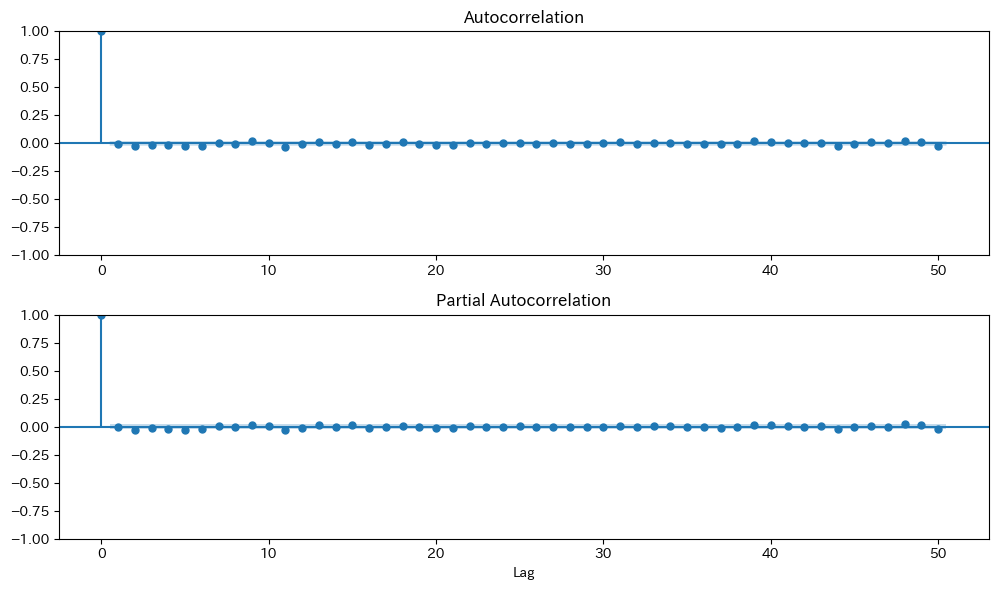

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# コレログラム
fig, ax = plt.subplots(2, 1, figsize=(10,6))

# 自己相関係数
plot_acf (stock_df['目的変数'], lags=50, ax=ax[0]) 

# 偏自己相関係数
plot_pacf(stock_df['目的変数'], lags=50, ax=ax[1]) 

plt.xlabel('Lag')
plt.tight_layout()
plt.show()

変化率は自己相関が極めて弱く、自己回帰モデルで求めることは難しそう

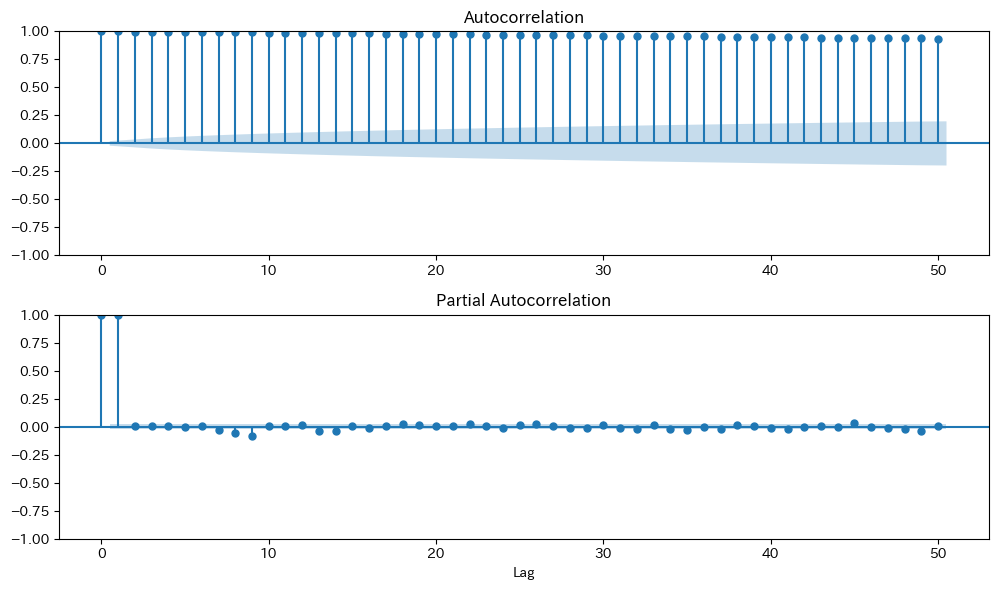

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# コレログラム
fig, ax = plt.subplots(2, 1, figsize=(10,6))

# 自己相関係数
plot_acf (stock_df['終値'], lags=50, ax=ax[0]) 

# 偏自己相関係数
plot_pacf(stock_df['終値'], lags=50, ax=ax[1]) 

plt.xlabel('Lag')
plt.tight_layout()
plt.show()

終値の場合は自己相関が強い

In [43]:
train_data = stock_df[(stock_df['日付け'].dt.year >= 2013) & (stock_df['日付け'].dt.year <= 2022)]
positive_count = (train_data['目的変数'] > 0).sum()

negative_count = (train_data['目的変数'] < 0).sum()

#カテゴリ変数化した場合の目的変数の均衡性を見る
print(f"正の数: {positive_count}")
print(f"負の数: {negative_count}")

正の数: 1209
負の数: 1145


(ほぼ)均衡データであると言える